# Customer Churn Analysis

In [542]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [543]:
#Import dataset
pd.set_option("display.max_columns",None)
df=pd.read_csv("customer_churn_analysis_dataset.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Problem Definition

Case of supervised learning as target variable is given ie "Churn" . ML classification model has to be trained using the dataset for predicting the customer churn rate or attrition

# Data Analysis

In [544]:
#Check rows & columns
print("(Rows,Columns)",df.shape)

(Rows,Columns) (7043, 21)


In [545]:
#Check null values in train data
df.isnull().sum()
# Dataset has no null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [546]:
#Check the datatype of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [547]:
#Check the target variable
df["Churn"].value_counts()
#Data imbalance

No     5174
Yes    1869
Name: Churn, dtype: int64

In [548]:
print(df["Churn"].unique())
print(df["Churn"].nunique())

['No' 'Yes']
2


In [549]:
#Convert "target" variable into numeric
# No is 0
# Yes is 1
df["Churn"]= df["Churn"].replace("No",0)
df["Churn"]= df["Churn"].replace("Yes",1)

In [550]:
#Check the "target variable"
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [551]:
#Check all the independent varaibles
# 1.customerID
print(df["customerID"].unique())
print(df["customerID"].nunique())
#There are 7043 unique id's

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
7043


In [552]:
# 2.Gender
print(df["gender"].unique())
print(df["gender"].nunique())
print(df["gender"].value_counts())

['Female' 'Male']
2
Male      3555
Female    3488
Name: gender, dtype: int64


In [553]:
# 3.Senior Citizen
print(df["SeniorCitizen"].unique())
print(df["SeniorCitizen"].nunique())

[0 1]
2


In [554]:
print(df["SeniorCitizen"].value_counts())

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


In [555]:
# 4.Partner
print(df["Partner"].unique())
print(df["Partner"].nunique())

['Yes' 'No']
2


In [556]:
print(df["Partner"].value_counts())

No     3641
Yes    3402
Name: Partner, dtype: int64


In [557]:
# 5.Dependents
print(df["Dependents"].unique())
print(df["Dependents"].nunique())

['No' 'Yes']
2


In [558]:
print(df["Dependents"].value_counts())

No     4933
Yes    2110
Name: Dependents, dtype: int64


In [559]:
# 6.Tenure
print(df["tenure"].value_counts())

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


In [560]:
# 7.PhoneService
print(df["PhoneService"].unique())
print(df["PhoneService"].nunique())

['No' 'Yes']
2


In [561]:
df["PhoneService"].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [562]:
# 8.MultipleLines
print(df["MultipleLines"].unique())
print(df["MultipleLines"].nunique())

['No phone service' 'No' 'Yes']
3


In [563]:
df["MultipleLines"].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [564]:
# 9.InternetService
print(df["InternetService"].unique())
print(df["InternetService"].nunique())

['DSL' 'Fiber optic' 'No']
3


In [565]:
df["InternetService"].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [566]:
# 10.OnlineSecurity
print(df["OnlineSecurity"].unique())
print(df["OnlineSecurity"].nunique())

['No' 'Yes' 'No internet service']
3


In [567]:
df["OnlineSecurity"].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [568]:
# 11.OnlineBackup
print(df["OnlineBackup"].unique())
print(df["OnlineBackup"].nunique())

['Yes' 'No' 'No internet service']
3


In [569]:
df["OnlineBackup"].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [570]:
# 12.DeviceProtection
print(df["DeviceProtection"].unique())
print(df["DeviceProtection"].nunique())

['No' 'Yes' 'No internet service']
3


In [571]:
df["DeviceProtection"].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [572]:
# 13.TechSupport
print(df["TechSupport"].unique())
print(df["TechSupport"].nunique())

['No' 'Yes' 'No internet service']
3


In [573]:
df["TechSupport"].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [574]:
# 14.StreamingTV
print(df["StreamingTV"].unique())
print(df["StreamingTV"].nunique())

['No' 'Yes' 'No internet service']
3


In [575]:
df["StreamingTV"].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [576]:
# 15.StreamingMovies
print(df["StreamingMovies"].unique())
print(df["StreamingMovies"].nunique())

['No' 'Yes' 'No internet service']
3


In [577]:
df["StreamingMovies"].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [578]:
# 16.Contract
print(df["Contract"].unique())
print(df["Contract"].nunique())

['Month-to-month' 'One year' 'Two year']
3


In [579]:
df["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [580]:
# 17.PaperlessBilling
print(df["PaperlessBilling"].unique())
print(df["PaperlessBilling"].nunique())

['Yes' 'No']
2


In [581]:
df["PaperlessBilling"].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [582]:
# 18.PaymentMethod
print(df["PaymentMethod"].unique())
print(df["PaymentMethod"].nunique())

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
4


In [583]:
df["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [584]:
# 19.MonthlyCharges
print(df["MonthlyCharges"].unique())
print(df["MonthlyCharges"].nunique())

[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
1585


In [585]:
df["MonthlyCharges"].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
114.75     1
103.60     1
113.40     1
57.65      1
113.30     1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [586]:
# 20.TotalCharges
print(df["TotalCharges"].unique())
print(df["TotalCharges"].nunique())

['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
6531


In [587]:
df["TotalCharges"].value_counts()

20.2       11
           11
19.75       9
19.9        8
20.05       8
           ..
720.45      1
55.8        1
5083.55     1
299.2       1
65.95       1
Name: TotalCharges, Length: 6531, dtype: int64

In [588]:
#By checking the dataset , we observe that TotalCharges can be in Float datatype
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors='coerce')

In [589]:
#Check for null values
df["TotalCharges"].isnull().sum()

11

In [590]:
#Drop the null values from feature "Total Charges"
df.dropna(axis=0,inplace=True)
df.shape

(7032, 21)

In [591]:
#None the independents variable have special characters

In [592]:
#Check correlation between numeric variables
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.150541
tenure,0.015683,1.000000,0.246862,0.825880,-0.354049
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.192858
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484
Churn,0.150541,-0.354049,0.192858,-0.199484,1.000000


In [593]:
#Variables are very weakly correlated.

# EDA

<AxesSubplot:>

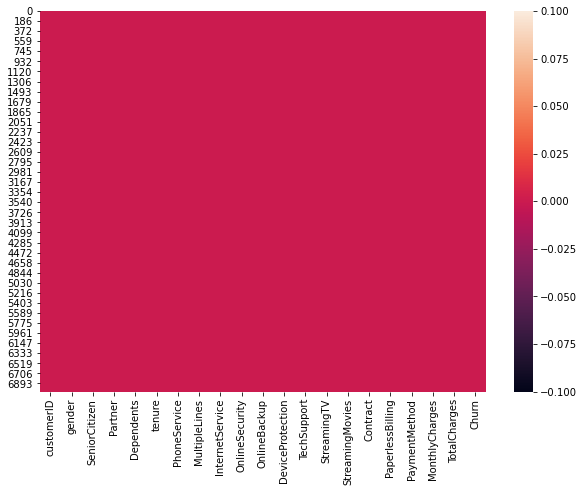

In [594]:
#Univariate analysis
#Check null values
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='gender', ylabel='count'>

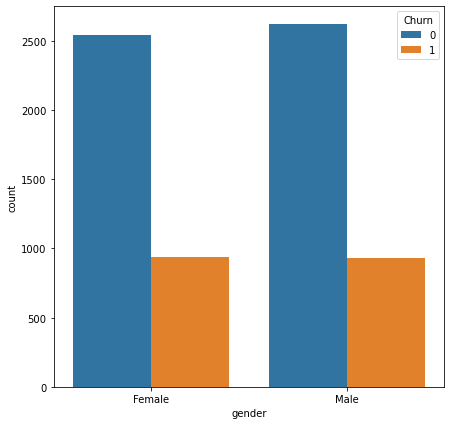

In [595]:
#Check gender vs target variable
plt.figure(figsize=(7,7))
sns.countplot(x="gender",data=df,hue="Churn")

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

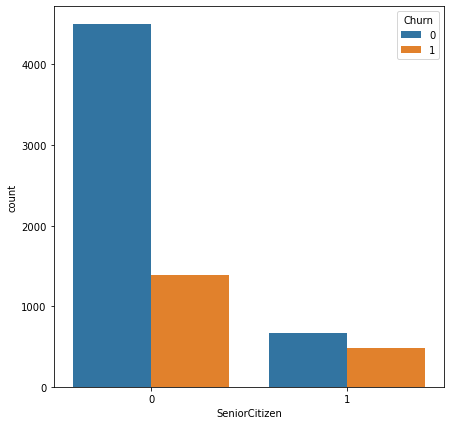

In [596]:
#Check "SeniorCitizen" vs churn rate
plt.figure(figsize=(7,7))
sns.countplot(x="SeniorCitizen",data=df,hue="Churn")

<AxesSubplot:xlabel='Partner', ylabel='count'>

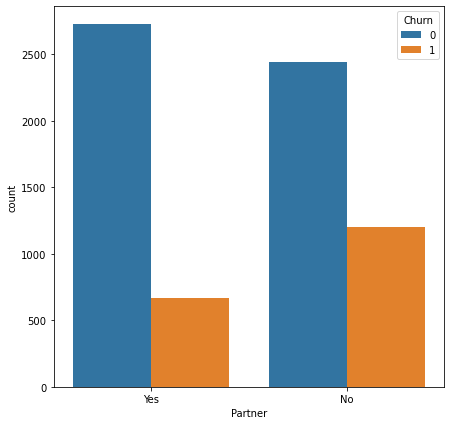

In [597]:
#Check "Partner" vs churn rate
plt.figure(figsize=(7,7))
sns.countplot(x="Partner",data=df,hue="Churn")

<AxesSubplot:xlabel='Dependents', ylabel='count'>

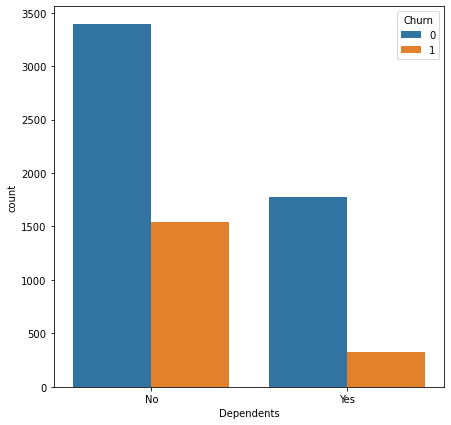

In [598]:
#Check "Partner" vs churn rate
plt.figure(figsize=(7,7))
sns.countplot(x="Dependents",data=df,hue="Churn")

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

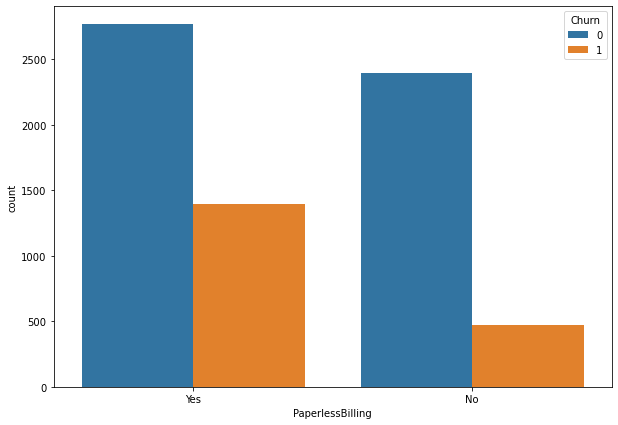

In [599]:
#Check "PaperlessBilling" vs churn rate
plt.figure(figsize=(10,7))
sns.countplot(x="PaperlessBilling",data=df,hue="Churn")

In [600]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

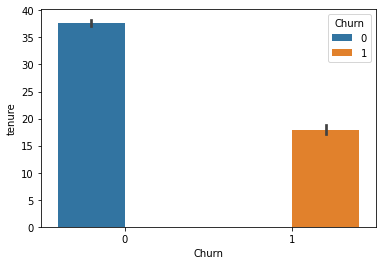

In [601]:
#Bi-variate analysis
#Check "tenure" vs churn rate
sns.barplot(x="Churn",y="tenure",data=df,hue="Churn")

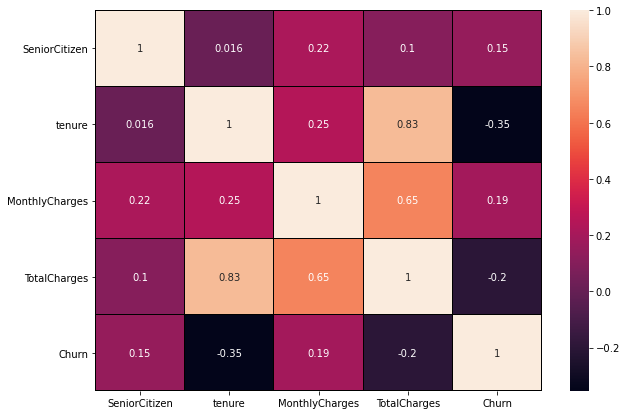

In [602]:
#Multi-variate analysis
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="Black")
plt.show()

# Pre-processing Pipeline

In [603]:
#Check data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [604]:
df.shape

(7032, 21)

In [605]:
#Check "customerID"
df["customerID"].nunique()
#customerID id unique for every customer when checked with rows ie 7043. Lets drop the column as it cannot be handled with coder

7032

In [606]:
#Drop column customerID
df.drop(columns=["customerID"],inplace=True)

In [607]:
df.shape

(7032, 20)

In [608]:
#Divide the dependent & independent variables
df_x=df.drop(columns=["Churn"])
df_y=df["Churn"]
print(df_x.shape,df_y.shape)

(7032, 19) (7032,)


In [609]:
#Convert independent variables into numeric
x=pd.get_dummies(df_x,drop_first=True)
x.shape

(7032, 30)

In [610]:
x.isnull().sum()

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMo

In [617]:
x.dtypes

SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                uint8
Partner_Yes                                uint8
Dependents_Yes                             uint8
PhoneService_Yes                           uint8
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No internet service       uint8
DeviceProtection_Yes                       uint8
TechSupport_No internet service            uint8
TechSupport_Yes                            uint8
StreamingTV_No inter

In [618]:
#Data scaling to achieve more accuracy
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scx=sc.fit_transform(x)
sc_x=pd.DataFrame(scx,columns=x.columns)
sc_x.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.440327,-1.280248,-1.161694,-0.994194,-1.009430,1.035617,-0.652305,-3.056334,3.056334,-0.854336,-0.886896,-0.52513,-0.52513,-0.633746,-0.52513,1.378330,-0.52513,-0.723918,-0.52513,-0.639260,-0.52513,-0.790186,-0.52513,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,1.404764,-0.543604
1,-0.440327,0.064303,-0.260878,-0.173740,0.990658,-0.965608,-0.652305,0.327189,-0.327189,-0.854336,-0.886896,-0.52513,-0.52513,1.577918,-0.52513,-0.725516,-0.52513,1.381372,-0.52513,-0.639260,-0.52513,-0.790186,-0.52513,-0.796849,1.943495,-0.561364,-1.206361,-0.525351,-0.711863,1.839576
2,-0.440327,-1.239504,-0.363923,-0.959649,0.990658,-0.965608,-0.652305,0.327189,-0.327189,-0.854336,-0.886896,-0.52513,-0.52513,1.577918,-0.52513,1.378330,-0.52513,-0.723918,-0.52513,-0.639260,-0.52513,-0.790186,-0.52513,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,-0.711863,1.839576
3,-0.440327,0.512486,-0.747850,-0.195248,0.990658,-0.965608,-0.652305,-3.056334,3.056334,-0.854336,-0.886896,-0.52513,-0.52513,1.577918,-0.52513,-0.725516,-0.52513,1.381372,-0.52513,1.564308,-0.52513,-0.790186,-0.52513,-0.796849,1.943495,-0.561364,-1.206361,-0.525351,-0.711863,-0.543604
4,-0.440327,-1.239504,0.196178,-0.940457,-1.009430,-0.965608,-0.652305,0.327189,-0.327189,-0.854336,1.127527,-0.52513,-0.52513,-0.633746,-0.52513,-0.725516,-0.52513,-0.723918,-0.52513,-0.639260,-0.52513,-0.790186,-0.52513,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,1.404764,-0.543604


In [619]:
#Considering n_components
from sklearn.decomposition import PCA
pca=PCA(n_components=30)
pc_x=pca.fit_transform(sc_x)

#Information retained in data after dimensionality reduction
print("Percentage info retained in data=",(sum(pca.explained_variance_ratio_)*100))

Percentage info retained in data= 100.0


In [620]:
#CHeck rows & columns
print(pc_x.shape,df_y.shape)

(7032, 30) (7032,)


In [621]:
# Dealing data imbalance with under sampling and selecting the random sample for analysis.
from imblearn.under_sampling import RandomUnderSampler
rm=RandomUnderSampler(random_state=42)
x_res,y_res=rm.fit_resample(pc_x,df_y.values.ravel())

In [622]:
print('After UnderSampling, the shape of x: {}'.format(x_res.shape)) 
print('After UnderSampling, the shape of y: {} \n'.format(y_res.shape)) 
  
print("After UnderSampling, counts of label '1': {}".format(sum(y_res == 1))) 
print("After UnderSampling, counts of label '0': {}".format(sum(y_res == 0)))

After UnderSampling, the shape of x: (3738, 30)
After UnderSampling, the shape of y: (3738,) 

After UnderSampling, counts of label '1': 1869
After UnderSampling, counts of label '0': 1869


In [623]:
y_res

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [624]:
y_res=y_res.reshape(-1,1)
y_res

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

 # Building Machine Learning Models

In [625]:
#Lets use f1-score,confusion matrix,classification report & AUC_ROC as metrics 
from sklearn.metrics import f1_score,classification_report,confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
def maxf1_score(clf,x,y):
    maxf1=0
    rs=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        tmp=f1_score(y_test,y_pred)
        if tmp>maxf1:
            maxf1=tmp
            rs=r_state
    print("Maximum f1_score is at random state :",rs," and it is :",maxf1)
    print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
    print("Classification report \n",classification_report(y_test,y_pred))
    
    #AUC-ROC Curve-Logistic regression
    lg_disp = plot_roc_curve(clf,x_test,y_test)
    plt.title("ROC")
    plt.show()

In [626]:
#User defined function for cross-validation
from sklearn.model_selection import cross_val_score
def cross_val(model,x,y):
    cv=cross_val_score(model,x,y,cv=5,scoring="f1")
    print("Mean f1 score for classifier: ",cv.mean())
    print(cv)

# 1.Logistic Regression

Maximum f1_score is at random state : 52  and it is : 0.6395348837209303
Confusion matrix 
 [[928 105]
 [187 187]]
Classification report 
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



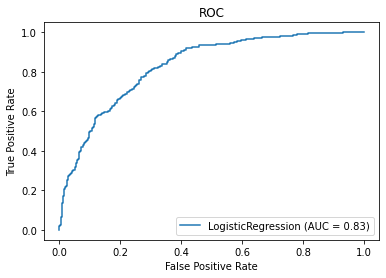

In [629]:
#Logistics Regression 
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
maxf1_score(lg,x,df_y)

In [631]:
#Cross validation of Logistic regression
cross_val(lg,x,df_y)

Mean f1 score for classifier:  0.593308216327838
[0.59070465 0.5994152  0.57142857 0.60499266 0.6       ]


Maximum f1_score is at random state : 76  and it is : 0.8005284015852047
Confusion matrix 
 [[278  96]
 [ 68 306]]
Classification report 
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       374
           1       0.76      0.82      0.79       374

    accuracy                           0.78       748
   macro avg       0.78      0.78      0.78       748
weighted avg       0.78      0.78      0.78       748



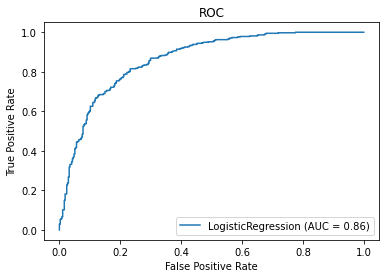

In [630]:
#Logistics Regression with undersampled data 
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
maxf1_score(lg,x_res,y_res)

In [632]:
#Cross validation of Logistic regression
cross_val(lg,x_res,y_res)

Mean f1 score for classifier:  0.7710419277625393
[0.78544542 0.78562259 0.76153846 0.7591623  0.76344086]


# 2. Decision Tree Classifier

In [633]:
#Hyper parameter tuning 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
dt_clf=DecisionTreeClassifier()
clf = GridSearchCV(dt_clf, parameters, cv=5)
clf.fit(x_res,y_res)
clf.best_params_

{'criterion': 'entropy', 'max_depth': 5}

Maximum f1_score is at random state : 97  and it is : 0.7789473684210526
Confusion matrix 
 [[282  92]
 [101 273]]
Classification report 
               precision    recall  f1-score   support

           0       0.74      0.75      0.75       374
           1       0.75      0.73      0.74       374

    accuracy                           0.74       748
   macro avg       0.74      0.74      0.74       748
weighted avg       0.74      0.74      0.74       748



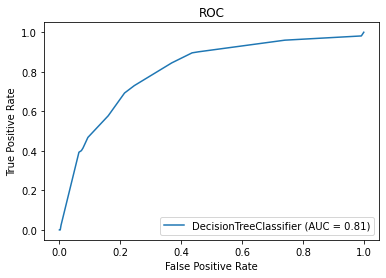

In [634]:
#Decision tree Classifier
dt=DecisionTreeClassifier(criterion="entropy",max_depth=4)
maxf1_score(dt,x_res,y_res)

In [635]:
#Cross validation (Decision Tree Classifier)
cross_val(dt,x_res,y_res)

Mean f1 score for classifier:  0.7353641220296527
[0.72816728 0.70571429 0.75746714 0.74634146 0.73913043]


# 3. K Nearest Classifier

In [637]:
#For KNN we need to know the best value of k using grid search
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=5,scoring="f1")
clf.fit(x_res,y_res)
clf.best_params_

{'n_neighbors': 29}

Maximum f1_score is at random state : 76  and it is : 0.7905824039653035
Confusion matrix 
 [[242 132]
 [ 49 325]]
Classification report 
               precision    recall  f1-score   support

           0       0.83      0.65      0.73       374
           1       0.71      0.87      0.78       374

    accuracy                           0.76       748
   macro avg       0.77      0.76      0.76       748
weighted avg       0.77      0.76      0.76       748



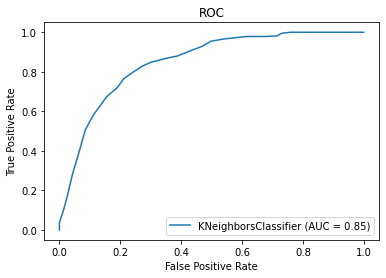

In [638]:
#KNN Classifier
knc=KNeighborsClassifier(n_neighbors=29)
maxf1_score(knc,x_res,y_res)

In [639]:
#Cross validation (KNN)
cross_val(knc,x_res,y_res)

Mean f1 score for classifier:  0.7676128330479475
[0.77882353 0.77925211 0.75845411 0.76213592 0.7593985 ]


# 4. Random Forest Classifier

In [640]:
#Hyper parameter tuning 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5)
clf.fit(x_res,y_res)
clf.best_params_

{'n_estimators': 100}

Maximum f1_score is at random state : 92  and it is : 0.766355140186916
Confusion matrix 
 [[281  93]
 [ 86 288]]
Classification report 
               precision    recall  f1-score   support

           0       0.77      0.75      0.76       374
           1       0.76      0.77      0.76       374

    accuracy                           0.76       748
   macro avg       0.76      0.76      0.76       748
weighted avg       0.76      0.76      0.76       748



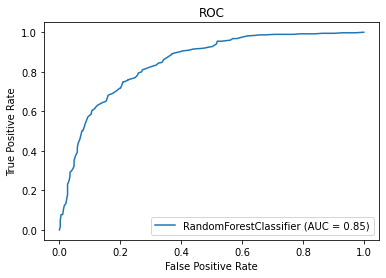

In [641]:
#Random forest classifier
rf_clf=RandomForestClassifier(n_estimators=100)
maxf1_score(rf_clf,x_res,y_res)

In [642]:
#Cross validation (Random Forest Classifier)
cross_val(rf_clf,x_res,y_res)

Mean f1 score for classifier:  0.7306176074064913
[0.76165803 0.73251029 0.71349862 0.73485868 0.71056241]


# 5. Naive Bayes Classifier

Maximum f1_score is at random state : 97  and it is : 0.7885572139303482
Confusion matrix 
 [[271 103]
 [ 67 307]]
Classification report 
               precision    recall  f1-score   support

           0       0.80      0.72      0.76       374
           1       0.75      0.82      0.78       374

    accuracy                           0.77       748
   macro avg       0.78      0.77      0.77       748
weighted avg       0.78      0.77      0.77       748



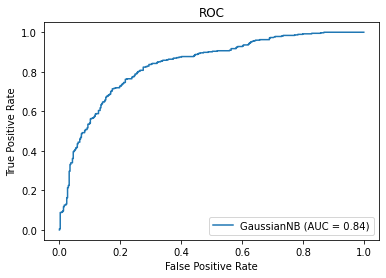

In [649]:
#2.Naive Bayes Classifier- GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
maxf1_score(gnb,x_res,y_res)

In [650]:
#Cross validation
cross_val(gnb,x_res,y_res)

Mean f1 score for classifier:  0.7553599815168315
[0.75376884 0.76962677 0.75380711 0.75257732 0.74701987]


# 6. Support Vector Classifier

In [643]:
#Support Vector Classifier
#Check best parameter for SVC (Hyper parameter tuning )
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="f1")
clf.fit(x_res,y_res)
clf.best_params_

{'C': 1, 'kernel': 'poly'}

Maximum f1_score is at random state : 97  and it is : 0.7941176470588236
Confusion matrix 
 [[264 110]
 [ 70 304]]
Classification report 
               precision    recall  f1-score   support

           0       0.79      0.71      0.75       374
           1       0.73      0.81      0.77       374

    accuracy                           0.76       748
   macro avg       0.76      0.76      0.76       748
weighted avg       0.76      0.76      0.76       748



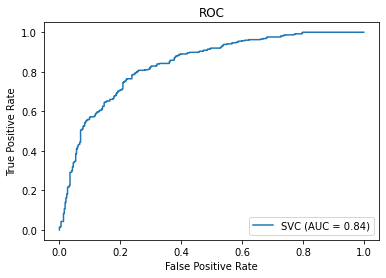

In [644]:
svc=SVC(kernel="poly",C=1)
maxf1_score(svc,x_res,y_res)

In [645]:
#Cross validation (Support Vector Classifier)
cross_val(svc,x_res,y_res)

Mean f1 score for classifier:  0.7676563467036503
[0.7799511  0.77961783 0.76010101 0.75572519 0.7628866 ]


# 7.Ada Boost Classifier

In [646]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
parameters= { 'n_estimators': [50, 100],'learning_rate' : [0.01,0.05,0.1,0.3,1],'algorithm' : ['SAMME', 'SAMME.R']}
 
rgr = RandomizedSearchCV(AdaBoostClassifier(),param_distributions=parameters ,cv=3,n_iter = 10,n_jobs=-1)
rgr.fit(x_res,y_res)
rgr.best_params_

{'n_estimators': 100, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}

Maximum f1_score is at random state : 97  and it is : 0.7989949748743719
Confusion matrix 
 [[279  95]
 [ 71 303]]
Classification report 
               precision    recall  f1-score   support

           0       0.80      0.75      0.77       374
           1       0.76      0.81      0.78       374

    accuracy                           0.78       748
   macro avg       0.78      0.78      0.78       748
weighted avg       0.78      0.78      0.78       748



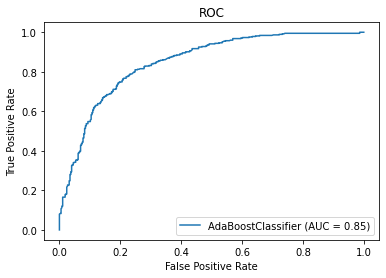

In [647]:
adr=AdaBoostClassifier(n_estimators=100,algorithm="SAMME.R",learning_rate=0.1)
maxf1_score(adr,x_res,y_res)

In [648]:
#Cross validation (Ada Boost Classifier)
cross_val(adr,x_res,y_res)

Mean f1 score for classifier:  0.7561844568207541
[0.77346683 0.75942783 0.74771242 0.74160207 0.75871314]


In [653]:
#Result
result=pd.DataFrame({"Classifier Model":["Logistic Regression","Decision Tree","K-Nearest Neighbour","Random Forest",
                                         "Gaussian Naive Bayes","Support Vector","AdaBoost"],
                     "Random State":[76,97,76,92,97,97,97],
                     "F1":[0.80,0.78,0.79,0.77,0.79,0.79,0.80],
                    "Cross Validation":[0.77,0.73,0.77,0.73,0.75,0.77,0.76],
                    "AUC":[0.86,0.81,0.85,0.86,0.84,0.84,0.85]})
result["Difference(F1- Cross Validation)"]=result["F1"]-result["Cross Validation"]
result

,Classifier Model,Random State,F1,Cross Validation,AUC,Difference(F1- Cross Validation)
0,Logistic Regression,76,0.80,0.77,0.86,0.03
1,Decision Tree,97,0.78,0.73,0.81,0.05
2,K-Nearest Neighbour,76,0.79,0.77,0.85,0.02
3,Random Forest,92,0.77,0.73,0.86,0.04
4,Gaussian Naive Bayes,97,0.79,0.75,0.84,0.04
5,Support Vector,97,0.79,0.77,0.84,0.02
6,AdaBoost,97,0.80,0.76,0.85,0.04


In [ ]:
#K-Nearest neighbor & Support Vector Classifier are best performing model. But "AUC" is better K-Nearest neighbor.
# Hence K Nearest Neighbor is the best performing model.

In [656]:
#Saving the best model
#Random state=88
from sklearn.neighbors import KNeighborsClassifier
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,random_state = 76,test_size=0.20)
knc=KNeighborsClassifier(n_neighbors=29)
knc.fit(x_train,y_train)
y_pred=knc.predict(x_test)
      
print("F1 score=",f1_score(y_test,y_pred))
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("Classification report \n",classification_report(y_test,y_pred))

F1 score= 0.7718040621266428
Confusion matrix 
 [[234 131]
 [ 60 323]]
Classification report 
               precision    recall  f1-score   support

           0       0.80      0.64      0.71       365
           1       0.71      0.84      0.77       383

    accuracy                           0.74       748
   macro avg       0.75      0.74      0.74       748
weighted avg       0.75      0.74      0.74       748



In [657]:
#Saving the best model
import joblib
joblib.dump(knc,'Customer_churn.joblib')

['Customer_churn.joblib']